In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle(1)/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle.json ~/.kaggle(1)/'


In [2]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 94% 312M/331M [00:01<00:00, 225MB/s]
100% 331M/331M [00:03<00:00, 87.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utkface-new.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dropout, Flatten, Conv2D,MaxPooling2D, BatchNormalization, Dense
from keras.layers import Input,Activation,Add
from keras.regularizers import l2
from keras.optimizers import Adam, Adagrad,Adadelta,Adamax, RMSprop
from keras.models import Model



In [2]:
fildr = '/content/UTKFace'

In [3]:
import os
files = os.listdir(fildr)

In [5]:
ages=[]
genders = []
images =[]

for i in files:
  age = i.split('_')[0]
  gender = i.split('_')[1]
  total = fildr +'/'+ i

  image = cv2.imread(total)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(70,70))

  images.append(image)
  ages.append(int(age))
  genders.append(int(gender))

In [6]:
len(images)

23708

21 0


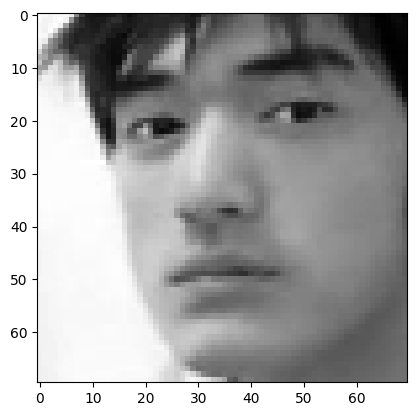

In [33]:
index=  1000
plt.imshow(images[index],cmap='gray')
print(ages[index],genders[index])

In [8]:
images_f = np.array(images)
ages_f= np.array(ages)
genders_f= np.array(genders)

In [9]:
values , counts = np.unique(genders_f,return_counts = True)
print(counts)                 ###balanced dataset
print(values)

[12391 11317]
[0 1]


In [10]:
values , counts = np.unique(ages_f,return_counts = True)
print(counts)
print(values)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


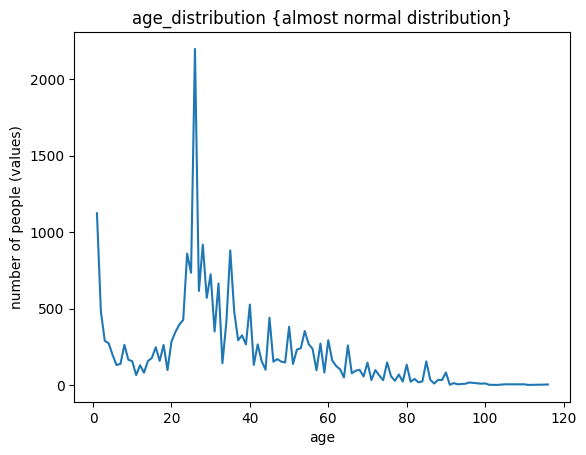

In [11]:
plt.plot(values,counts)
plt.title('age_distribution {almost normal distribution}')
plt.xlabel('age')
plt.ylabel('number of people (values)')
plt.show()

In [12]:
print("age",np.argmax(counts)," ","max counts = ",np.max(counts))

age 25   max counts =  2197


In [13]:
labels = []
for i in range(len(ages)):
  labels.append([ages[i],genders[i]])


In [14]:
labels

[[66, 1],
 [35, 0],
 [28, 0],
 [1, 0],
 [45, 0],
 [70, 0],
 [26, 1],
 [1, 1],
 [1, 1],
 [51, 0],
 [36, 0],
 [30, 0],
 [32, 1],
 [36, 1],
 [45, 0],
 [41, 0],
 [26, 1],
 [1, 0],
 [14, 0],
 [29, 1],
 [9, 1],
 [1, 0],
 [41, 0],
 [7, 0],
 [30, 0],
 [66, 1],
 [44, 0],
 [1, 1],
 [35, 0],
 [12, 0],
 [82, 1],
 [29, 0],
 [24, 0],
 [1, 1],
 [46, 0],
 [31, 1],
 [65, 0],
 [26, 0],
 [3, 0],
 [26, 1],
 [34, 0],
 [1, 1],
 [52, 0],
 [22, 1],
 [30, 0],
 [95, 1],
 [32, 0],
 [26, 0],
 [7, 0],
 [22, 0],
 [47, 0],
 [48, 0],
 [28, 1],
 [30, 1],
 [4, 1],
 [26, 1],
 [20, 0],
 [20, 1],
 [30, 0],
 [40, 0],
 [25, 1],
 [8, 1],
 [16, 1],
 [25, 1],
 [72, 0],
 [82, 0],
 [36, 0],
 [76, 0],
 [29, 1],
 [24, 1],
 [1, 1],
 [1, 0],
 [1, 0],
 [9, 0],
 [57, 0],
 [19, 0],
 [27, 1],
 [23, 1],
 [25, 0],
 [70, 1],
 [38, 0],
 [58, 0],
 [53, 0],
 [56, 1],
 [14, 0],
 [28, 0],
 [20, 1],
 [54, 0],
 [1, 1],
 [40, 0],
 [24, 0],
 [14, 1],
 [17, 0],
 [25, 0],
 [2, 1],
 [4, 0],
 [34, 0],
 [25, 1],
 [32, 1],
 [26, 1],
 [26, 1],
 [38, 1],
 

In [15]:
images_f_2 = images_f/ 255.0
labels_f = np.array(labels)

In [16]:
print(images_f_2.shape,labels_f.shape)

(23708, 70, 70) (23708, 2)


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(images_f_2,labels_f,test_size = 0.2,random_state = 42)

In [18]:
print(x_train.shape,y_train.shape)

(18966, 70, 70) (18966, 2)


In [19]:
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [20]:
def Convulation(input_tensor, filters):
  x=Conv2D(filters=filters, kernel_size=(3,3),padding = 'same',strides=(1,1),kernel_regularizer=l2(0.0001))(input_tensor)
  x=Dropout(0.1)(x)
  x=Activation('relu')(x)
  return x

In [26]:
def model(input_shape):
  input = Input((input_shape))
  conv1 = Convulation(input,32)
  pool1 = MaxPooling2D(pool_size = (2,2))(conv1)

  conv2 = Convulation(pool1,64)
  pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

  conv3 = Convulation(pool2,128)
  pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

  conv4 = Convulation(pool3,256)
  pool4 = MaxPooling2D(pool_size=(2,2))(conv4)

  conv5 = Convulation(pool4, 512)
  pool5 = MaxPooling2D(pool_size=(2,2))(conv5)

  conv6 = Convulation(pool5, 512)
  pool6 = MaxPooling2D(pool_size=(2,2))(conv6)

  flatten = Flatten()(pool6)

  dense1 = Dense(64,activation = 'relu')(flatten)
  dense2 = Dense(64,activation = 'relu')(flatten)

  drop_1 = Dropout(0.2)(dense1)
  drop_2 = Dropout(0.2)(dense2)

  output_1 = Dense(1,activation = 'sigmoid',name='sex_out')(drop_1)     ## gender_output
  output_2 = Dense(1,activation = 'relu', name ='age_out')(drop_2)      ## age_output

  x = Model(inputs = [input], outputs = [output_1,output_2])
  x.compile(
        loss={'sex_out': 'binary_crossentropy', 'age_out': 'mae'},
        optimizer="rmsprop",
        metrics={'sex_out': ['accuracy'], 'age_out': ['mae']}
    )

  return x

In [27]:
m = model((70,70,1))

In [28]:
m.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 70, 70, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 70, 70, 32)     │            320 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 70, 70, 32)     │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 70, 70, 32)     │              0 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 35, 35, 32)     │              0 │ activation_6[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 35, 35, 64)     │         18,496 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 35, 35, 64)     │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 35, 35, 64)     │              0 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 17, 17, 64)     │              0 │ activation_7[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 17, 17, 128)    │         73,856 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 17, 17, 128)    │              0 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 17, 17, 128)    │              0 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 8, 8, 128)      │              0 │ activation_8[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 256)      │        295,168 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 8, 8, 256)      │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 8, 8, 256)      │              0 │ dropout_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 4, 4, 256)      │              0 │ activation_9[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 3,993,602 (15.23 MB)

 Trainable params: 3,993,602 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
file_s = 'age_sex_detection_rmsprop.keras'
checkpoint = ModelCheckpoint(file_s,monitor = 'val_loss',verbose = 1,save_best_only = True,mode = 'auto',save_freq='epoch')
early_stop = tf.keras.callbacks.EarlyStopping(patience = 75,monitor ='val_loss',restore_best_weights=True)
callback_list = [checkpoint,early_stop]

In [32]:
history =m.fit(x_train,y_train_2,batch_size = 64, epochs=100,validation_data=[x_test,y_test_2],callbacks = callback_list)

Epoch 1/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - age_out_loss: 10.7693 - age_out_mae: 10.7693 - loss: 11.4947 - sex_out_accuracy: 0.6374 - sex_out_loss: 0.6406
Epoch 1: val_loss improved from inf to 11.97035, saving model to age_sex_detection_rmsprop.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - age_out_loss: 10.7684 - age_out_mae: 10.7684 - loss: 11.4938 - sex_out_accuracy: 0.6375 - sex_out_loss: 0.6405 - val_age_out_loss: 11.2715 - val_age_out_mae: 11.2741 - val_loss: 11.9704 - val_sex_out_accuracy: 0.6894 - val_sex_out_loss: 0.6098
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - age_out_loss: 9.5909 - age_out_mae: 9.5909 - loss: 10.2769 - sex_out_accuracy: 0.6922 - sex_out_loss: 0.5974
Epoch 2: val_loss improved from 11.97035 to 9.72396, saving model to age_sex_detection_rmsprop.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - age_out_loss: 9.5908 - age_out_mae: 9.5908 - loss: 10.2767 - sex_out_accuracy: 0.6922 - sex_out_loss: 0.5973 - val_age_out_loss: 9.0505 - 

In [34]:
m.evaluate(x_test,y_test_2)

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - age_out_loss: 5.8860 - age_out_mae: 5.8858 - loss: 6.6264 - sex_out_accuracy: 0.8841 - sex_out_loss: 0.2846


[6.654955863952637,
 0.27485164999961853,
 5.940728187561035,
 5.92744255065918,
 0.8854913711547852]

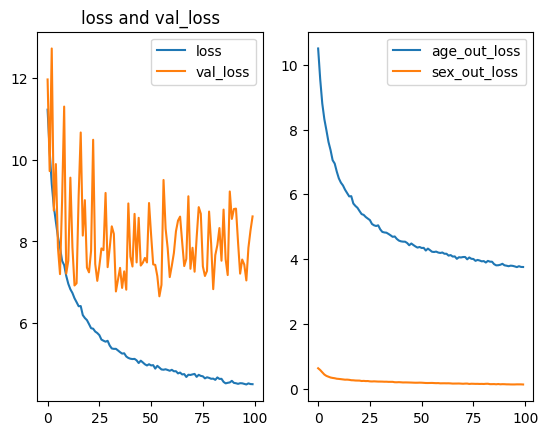

In [35]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss and val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['age_out_loss'], label='age_out_loss')
plt.plot(history.history['sex_out_loss'],label='sex_out_loss')
plt.legend()
plt.show()

In [36]:
pred = m.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_32']
Received: inputs=Tensor(shape=(32, 70, 70))
  warnings.warn(msg)


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [37]:
pred[1]

array([[26.525377],
       [31.438116],
       [44.897514],
       ...,
       [67.09911 ],
       [17.094133],
       [ 1.219018]], dtype=float32)

In [38]:
y_test_2[1]

array([25, 34, 52, ..., 56,  5,  1])

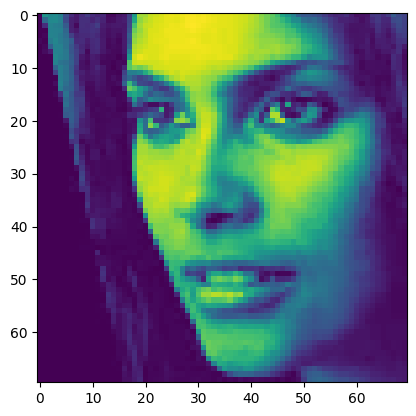

In [39]:
plt.imshow(x_test[0])

In [40]:
y_test[:,0]



array([25, 34, 52, ..., 56,  5,  1])

In [41]:
type(y_test_2[1])

numpy.ndarray

<ipython-input-42-1817afb5d68b>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot([np.min(y_test_2[1]),np.max(y_test_2[1]) ],[np.min(y_test_2[1]), np.max(y_test_2[1])], 'go--',color = 'red', linewidth = 3)


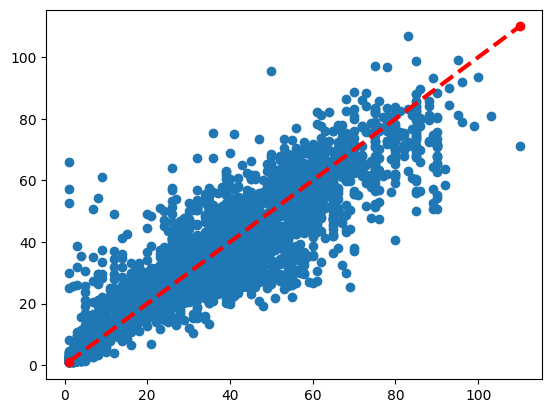

In [42]:
fig,ax = plt.subplots()
ax.scatter(y_test_2[1], pred[1])
plt.plot([np.min(y_test_2[1]),np.max(y_test_2[1]) ],[np.min(y_test_2[1]), np.max(y_test_2[1])], 'go--',color = 'red', linewidth = 3)

In [43]:
print(y_test_2[0])

[1 0 0 ... 0 0 1]


In [44]:
pred_gender = np.where(pred[0]>=0.5,1,0)
print(pred_gender)                          ###preparing the confusion matrix for the gender prediction

[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [45]:
from sklearn.metrics import confusion_matrix,classification_report
result =  confusion_matrix(y_test_2[0],pred_gender)
print(result)
print(classification_report(y_test_2[0],pred_gender))

[[2121  295]
 [ 248 2078]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2416
           1       0.88      0.89      0.88      2326

    accuracy                           0.89      4742
   macro avg       0.89      0.89      0.89      4742
weighted avg       0.89      0.89      0.89      4742



<Axes: >

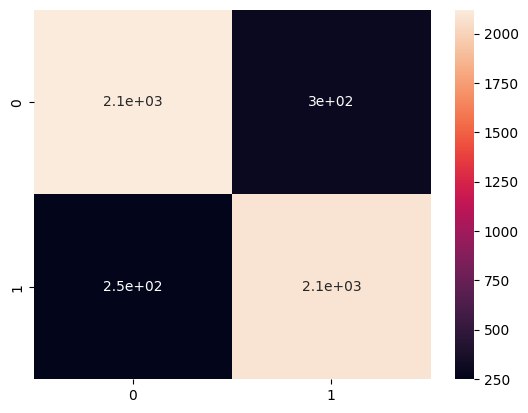

In [46]:
import seaborn as sns
sns.heatmap(result,annot=True)

In [47]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


<ipython-input-47-f6b4345c0bcd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-47-f6b4345c0bcd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


Predicted Age is 31
Predicted Gender is Male


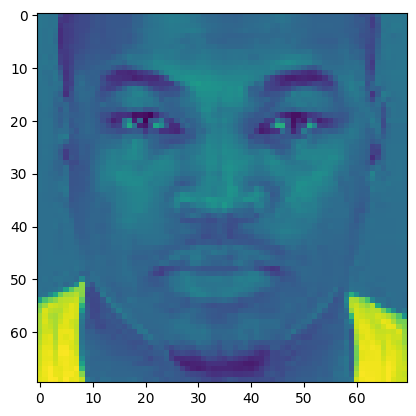

In [48]:
test_image(1,images_f,images_f_2,m)